In [4]:
import TensorCrossInterpolation as TCI
f(v) = 1/(1 + v' * v)
# There are 8 tensor indices, each with values 1...10
localdims = fill(10, 5)
tolerance = 1e-8
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)

(TensorCrossInterpolation.TensorCI2{Float64} with rank 11, [11, 11, 11], [2.0169632000723285e-9, 1.9111313748018586e-9, 1.9111313748018586e-9])

In [5]:
println(tci)

TensorCrossInterpolation.TensorCI2{Float64} with rank 11


In [15]:
println("Original function: $(f([-1, 2, 3, 4, 1]))")
println("TCI approximation: $(tci([1, 2, 3, 4, 1]))")


Original function: 0.03125
TCI approximation: 0.03125


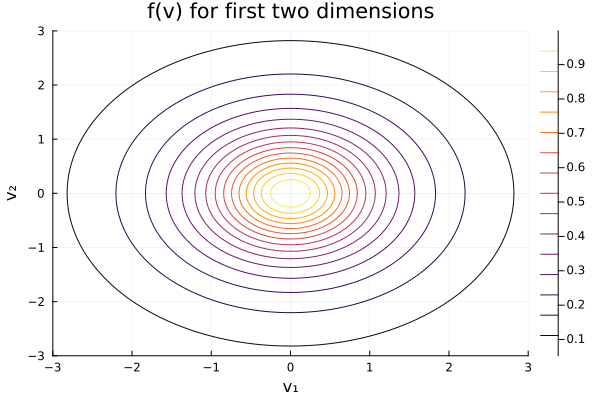

In [4]:
# visualize f(v)
using Plots

# Create a 2D grid
x = y = range(-3, 3, length=100)
z_original = [f([xi, yi, zeros(3)...]) for xi in x, yi in y]

# Create a surface plot
surface(x, y, z, 
    title="f(v) for first two dimensions",
    xlabel="v₁",
    ylabel="v₂",
    zlabel="f(v)")

# Or a contour plot
contour(x, y, z,
    title="f(v) for first two dimensions",
    xlabel="v₁",
    ylabel="v₂")


In [14]:
z_interpolated = [TCI.evaluate(tci, [xi, yi, zeros(3)...]) for xi in x, yi in y] # tci evaluation

# Plot both and the difference
p1 = surface(x, y, z_original, title="Original")
p2 = surface(x, y, z_interpolated, title="Interpolated")
p3 = surface(x, y, abs.(z_original - z_interpolated), title="Absolute Error")

plot(p1, p2, p3, layout=(1,3), size=(1200,400))


MethodError: MethodError: no method matching evaluate(::TensorCrossInterpolation.TensorCI2{Float64}, ::Vector{Float64})
The function `evaluate` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  evaluate(::TensorCrossInterpolation.AbstractTensorTrain{V}, !Matched::Union{NTuple{N, Int64}, AbstractVector{Int64}}) where {N, V}
   @ TensorCrossInterpolation ~/.julia/packages/TensorCrossInterpolation/RnYi9/src/abstracttensortrain.jl:124
  evaluate(::TensorCrossInterpolation.AbstractTensorTrain{V}, !Matched::Union{AbstractArray{NTuple{N, Int64}, 1}, NTuple{N, NTuple{M, Int64}}, AbstractVector{<:AbstractVector{Int64}}, NTuple{N, var"#s21"} where var"#s21"<:AbstractVector{Int64}}) where {N, M, V}
   @ TensorCrossInterpolation ~/.julia/packages/TensorCrossInterpolation/RnYi9/src/abstracttensortrain.jl:143
  evaluate(::TensorCrossInterpolation.AbstractTensorTrain{V}, !Matched::CartesianIndex) where V
   @ TensorCrossInterpolation ~/.julia/packages/TensorCrossInterpolation/RnYi9/src/abstracttensortrain.jl:139
  ...
